### Todos:
### 1. preprocess the data to make it suitable for glove embeding:
### a. remove ' from words( don't -> dont)
### b. convert all letters to lowercase ( Hoping -> hoping)
### 2. find the frequency of each emoji to see if the dataset is balanced and balance the dataset(important)

In [1]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt
import interesting_labels

In [2]:
import pandas

In [3]:
def get_data():
    header = ['tweet','label']
    data_set = pandas.read_csv('augmented_data.txt',delimiter='\t',names = header)
    return data_set

# def get_label_mapping():
#     original_list = interesting_labels.wanted_list
#     output_list = [i for i in range(len(original_list))]
#     return dict(zip(original_list,output_list))
  
def split_tweet(tweet):
    return tweet.split()    


In [4]:
data_set = get_data()

In [5]:
glove = torchtext.vocab.GloVe(name="twitter.27B",dim=50)

In [6]:
len(data_set)

82776

In [7]:
type(data_set['tweet'][0])

str

In [8]:
data_set

,tweet,label
0,hoping i dont screw up this interview,0
1,i feel like a baby kangaroo stuck in its mothe...,1
2,girl ppl should be happy i even remembered her...,0
3,"oh , the irony if misha wins the choice tv sc...",2
4,"i miss you to , you so fake now",2
5,"i miss you to , you so fake now",4
6,i know,1
7,bacolod please ? !,0
8,things can change so quickly,1
9,all me &amp ; vic do is laugh . . anybody o...,1


In [9]:
data_set

,tweet,label
0,hoping i dont screw up this interview,0
1,i feel like a baby kangaroo stuck in its mothe...,1
2,girl ppl should be happy i even remembered her...,0
3,"oh , the irony if misha wins the choice tv sc...",2
4,"i miss you to , you so fake now",2
5,"i miss you to , you so fake now",4
6,i know,1
7,bacolod please ? !,0
8,things can change so quickly,1
9,all me &amp ; vic do is laugh . . anybody o...,1


In [10]:
data_set

,tweet,label
0,hoping i dont screw up this interview,0
1,i feel like a baby kangaroo stuck in its mothe...,1
2,girl ppl should be happy i even remembered her...,0
3,"oh , the irony if misha wins the choice tv sc...",2
4,"i miss you to , you so fake now",2
5,"i miss you to , you so fake now",4
6,i know,1
7,bacolod please ? !,0
8,things can change so quickly,1
9,all me &amp ; vic do is laugh . . anybody o...,1


In [11]:
def get_tweet_words(glove_vector):
    train, valid, test = [],[],[]
    for i in range(len(data_set)):
        tweet = data_set['tweet'][i]
        if(type(tweet) != str):
            continue
        idxs = [glove_vector.stoi[w]        # lookup the index of word
                for w in split_tweet(tweet)
                if w in glove_vector.stoi] # keep words that has an embedding
        if not idxs: # ignore tweets without any word with an embedding
            continue
        idxs = torch.tensor(idxs) # convert list to pytorch tensor
        label = torch.tensor(data_set['label'][i]).long()
        if i % 5 < 3:
            train.append((idxs, label))
        elif i % 5 == 4:
            valid.append((idxs, label))
        else:
            test.append((idxs, label))
    return train, valid, test

In [12]:
train, valid, test = get_tweet_words(glove)

In [13]:
num_classes = len(set([element[1].item() for element in train]))
num_classes

6

In [14]:
train[0]

(tensor([3653,   10,  348, 6456,   85,   53, 2706]), tensor(0))

In [15]:
valid[0]

(tensor([  10,  292,   15,   16,    4,   15,   55, 1271,  110]), tensor(2))

In [16]:
len(train)

49272

### Recurrent Neural Network Module

In [17]:
rnn_layer = nn.RNN(input_size=50,    # dimension of the input repr
                   hidden_size=50,   # dimension of the hidden units
                   batch_first=True) # input format is [batch_size, seq_len, repr_dim]

In [28]:
#tweet_input = tweet_emb.unsqueeze(0) # add the batch_size dimension
#h0 = torch.zeros(1, 1, 50)     # initial hidden layer
#out, last_hidden = rnn_layer(tweet_input, h0)

In [ ]:
#print(out.shape)
#print(last_hidden.shape)

In [29]:
#out[:,-1,:]

### Building the model

In [30]:
class TweetRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetRNN, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

model = TweetRNN(input_size=50, hidden_size=50, num_classes=num_classes)

In [31]:
data_set.nunique()

tweet    63150
label        6
dtype: int64

In [32]:
import random

class TweetBatcher:
    def __init__(self, tweets, batch_size=32, drop_last=False):
        # store tweets by length
        self.tweets_by_length = {}
        for words, label in tweets:
            # compute the length of the tweet
            wlen = words.shape[0]
            # put the tweet in the correct key inside self.tweet_by_length
            if wlen not in self.tweets_by_length:
                self.tweets_by_length[wlen] = []
            self.tweets_by_length[wlen].append((words, label),)
         
        #  create a DataLoader for each set of tweets of the same length
        self.loaders = {wlen : torch.utils.data.DataLoader(
                                    tweets,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    drop_last=drop_last) # omit last batch if smaller than batch_size
            for wlen, tweets in self.tweets_by_length.items()}
        
    def __iter__(self): # called by Python to create an iterator
        # make an iterator for every tweet length
        iters = [iter(loader) for loader in self.loaders.values()]
        while iters:
            # pick an iterator (a length)
            im = random.choice(iters)
            try:
                yield next(im)
            except StopIteration:
                # no more elements in the iterator, remove it
                iters.remove(im)

In [33]:
for i, (tweets, labels) in enumerate(TweetBatcher(train, drop_last=True)):
    print(tweets.shape, labels.shape)
print(i)

torch.Size([32, 30]) torch.Size([32])
torch.Size([32, 18]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 31]) torch.Size([32])
torch.Size([32, 26]) torch.Size([32])
torch.Size([32, 12]) torch.Size([32])
torch.Size([32, 22]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 24]) torch.Size([32])
torch.Size([32, 24]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 28]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 25]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 22]) torch.Size([32])
torch.Size([32, 19]) torch.Size([32])
torch.Size([32, 22]) torch.Size([32])
torch.Size([32, 20]) torch.Size([32])
torch.Size([32, 26]) torch.Size([32])
torch.Size([32, 11]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 21]) torch.Size([32])
torch.Size([32, 14]) torch.Size([32])
torch.Size([32, 32]) torch.Size([32])
torch.Size([32, 23]) torch.Size([32])
torch.Size([32, 2

torch.Size([32, 17]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 17]) torch.Size([32])
torch.Size([32, 17]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 12]) torch.Size([32])
torch.Size([32, 15]) torch.Size([32])
torch.Size([32, 4]) torch.Size([32])
torch.Size([32, 9]) torch.Size([32])
torch.Size([32, 16]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 15]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 19]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 17]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 15]) torch.Size([32])
torch.Size([32, 4]) torch.Size([32])
torch.Size([32, 14]) torch.Size([32])
torch.Size([32, 25]) torch.Size([32])
torch.Size([32, 10]) tor

torch.Size([32, 16]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 16]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 4]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 14]) torch.Size([32])
torch.Size([32, 14]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 3]) torch.Size([32])
torch.Size([32, 16]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 13]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 14]) torch.Size([32])
torch.Size([32, 1]) torch.Size([32])
torch.Size([32, 15]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 11]) torch.Size([32])
torch.Size([32, 16]) torch.Size([32])
torch.Size([32, 8]) torch.S

torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 11]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 4]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 4]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 3]) torch.Size([32])
torch.Size([32, 6]) torch.Size([32])
torch.Size([32, 8]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 7]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 9]) torch.Size([32])
torch.Size([32, 9]) torch.Size([32])
torch.Size([32, 9]) torch.Size([3

In [34]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for tweets, labels in data_loader:
        output = model(tweets)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return float(correct) / float(total)

test_loader = TweetBatcher(test, batch_size=32, drop_last=False)
get_accuracy(model, test_loader)


0.13382469391484436

In [35]:
for i in range(10):
    model = TweetRNN(input_size=50, hidden_size=50, num_classes=num_classes)
    test_loader = TweetBatcher(test, batch_size=32, drop_last=False)
    print(get_accuracy(model, test_loader))

0.1973563988548456
0.17018943777791315
0.12304318694036669
0.04592800146189925
0.3663884997258939
0.10105378570993483
0.07035390144362551
0.07863799719802643
0.13796674179204482
0.3418407748066029


In [36]:
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for tweets, labels in train:
            optimizer.zero_grad()
            pred = model(tweets)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
        
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Epoch 1; Loss 1.196125; Train Acc 0.572779; Val Acc 0.568758
Epoch 2; Loss 1.144384; Train Acc 0.589170; Val Acc 0.588551
Epoch 3; Loss 1.262048; Train Acc 0.596340; Val Acc 0.594945
Epoch 4; Loss 1.406497; Train Acc 0.601708; Val Acc 0.600670
Epoch 5; Loss 1.171624; Train Acc 0.599449; Val Acc 0.600731
Epoch 6; Loss 0.953242; Train Acc 0.604712; Val Acc 0.604080
Epoch 7; Loss 1.099590; Train Acc 0.603925; Val Acc 0.603410
Epoch 8; Loss 1.317617; Train Acc 0.605624; Val Acc 0.605420
Epoch 9; Loss 1.026598; Train Acc 0.604360; Val Acc 0.605968
Epoch 10; Loss 0.915549; Train Acc 0.605956; Val Acc 0.604994
Epoch 11; Loss 0.935564; Train Acc 0.609043; Val Acc 0.608100
Epoch 12; Loss 0.811587; Train Acc 0.609023; Val Acc 0.607978
Epoch 13; Loss 1.207381; Train Acc 0.608132; Val Acc 0.606151
Epoch 14; Loss 1.055880; Train Acc 0.609769; Val Acc 0.609562
Epoch 15; Loss 1.026820; Train Acc 0.610535; Val Acc 0.609257
Epoch 16; Loss 1.134344; Train Acc 0.610826; Val Acc 0.607795
Epoch 17; Loss 0.

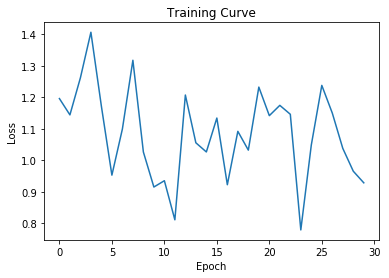

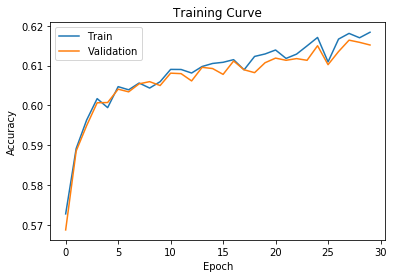

0.6132667357007979

In [37]:
model = TweetRNN(input_size=50, hidden_size=100, num_classes=num_classes)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=2e-3)
get_accuracy(model, test_loader)

Epoch 1; Loss 1.382724; Train Acc 0.596009; Val Acc 0.594945
Epoch 2; Loss 0.941131; Train Acc 0.599283; Val Acc 0.597503
Epoch 3; Loss 0.926416; Train Acc 0.599946; Val Acc 0.599147
Epoch 4; Loss 1.076725; Train Acc 0.602205; Val Acc 0.601949
Epoch 5; Loss 1.308780; Train Acc 0.604298; Val Acc 0.603106
Epoch 6; Loss 1.026170; Train Acc 0.604567; Val Acc 0.603167
Epoch 7; Loss 1.000217; Train Acc 0.601811; Val Acc 0.601888
Epoch 8; Loss 1.029443; Train Acc 0.602619; Val Acc 0.601827
Epoch 9; Loss 0.961039; Train Acc 0.607551; Val Acc 0.606395
Epoch 10; Loss 1.152977; Train Acc 0.608588; Val Acc 0.606395
Epoch 11; Loss 1.230722; Train Acc 0.609437; Val Acc 0.607308
Epoch 12; Loss 1.074141; Train Acc 0.611219; Val Acc 0.608892
Epoch 13; Loss 1.042272; Train Acc 0.607759; Val Acc 0.606943
Epoch 14; Loss 1.220872; Train Acc 0.611717; Val Acc 0.610292
Epoch 15; Loss 1.132153; Train Acc 0.613001; Val Acc 0.610049
Epoch 16; Loss 1.094233; Train Acc 0.607220; Val Acc 0.606882
Epoch 17; Loss 1.

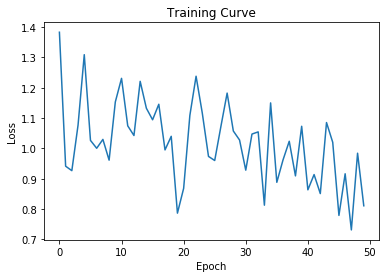

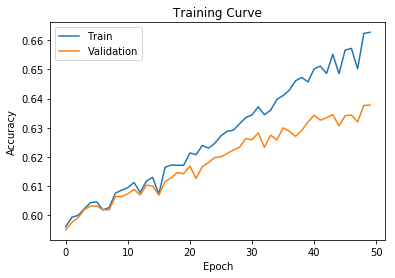

0.6348906621185356

In [44]:
model = TweetRNN(input_size=50, hidden_size=100, num_classes=num_classes)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=50, learning_rate=3e-4)
get_accuracy(model, test_loader)

### LSTM Model

In [38]:
class TweetLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetLSTM, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state and cell state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the LSTM
        out, _ = self.rnn(x, (h0, c0))
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

Epoch 1; Loss 0.987094; Train Acc 0.620918; Val Acc 0.616078
Epoch 2; Loss 0.930145; Train Acc 0.616255; Val Acc 0.612667
Epoch 3; Loss 1.069138; Train Acc 0.622430; Val Acc 0.618453
Epoch 4; Loss 0.951211; Train Acc 0.625062; Val Acc 0.620219
Epoch 5; Loss 0.971026; Train Acc 0.625808; Val Acc 0.619549
Epoch 6; Loss 1.007281; Train Acc 0.627010; Val Acc 0.620037
Epoch 7; Loss 0.910416; Train Acc 0.626243; Val Acc 0.620402
Epoch 8; Loss 1.043338; Train Acc 0.628067; Val Acc 0.622107
Epoch 9; Loss 1.152838; Train Acc 0.628937; Val Acc 0.622290
Epoch 10; Loss 0.911349; Train Acc 0.626637; Val Acc 0.618027
Epoch 11; Loss 1.064615; Train Acc 0.630181; Val Acc 0.620828
Epoch 12; Loss 0.948432; Train Acc 0.628274; Val Acc 0.620280
Epoch 13; Loss 1.100443; Train Acc 0.631341; Val Acc 0.622229
Epoch 14; Loss 1.224506; Train Acc 0.631880; Val Acc 0.622655
Epoch 15; Loss 1.110426; Train Acc 0.632792; Val Acc 0.623325
Epoch 16; Loss 1.120410; Train Acc 0.630160; Val Acc 0.622107
Epoch 17; Loss 1.

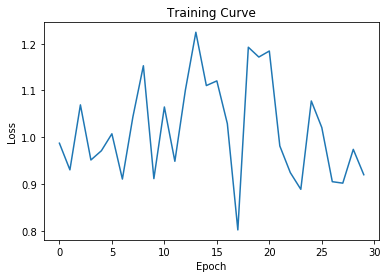

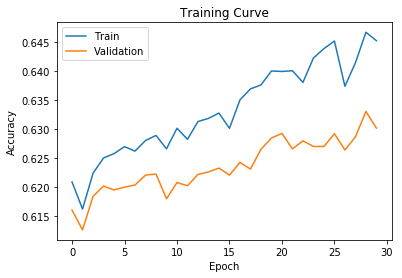

0.6277029908022173

In [39]:
model_lstm = TweetLSTM(input_size=50, hidden_size=50, num_classes=num_classes)
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=2e-4)
get_accuracy(model, test_loader)

Epoch 1; Loss 0.737553; Train Acc 0.696659; Val Acc 0.633069
Epoch 2; Loss 0.974372; Train Acc 0.694732; Val Acc 0.633374
Epoch 3; Loss 0.825448; Train Acc 0.695996; Val Acc 0.635810
Epoch 4; Loss 0.626224; Train Acc 0.692204; Val Acc 0.633069
Epoch 5; Loss 0.596084; Train Acc 0.691810; Val Acc 0.635627
Epoch 6; Loss 0.754991; Train Acc 0.695996; Val Acc 0.634044
Epoch 7; Loss 0.716268; Train Acc 0.693447; Val Acc 0.637637
Epoch 8; Loss 0.719830; Train Acc 0.694608; Val Acc 0.633191
Epoch 9; Loss 0.694248; Train Acc 0.694836; Val Acc 0.636967
Epoch 10; Loss 0.880761; Train Acc 0.695126; Val Acc 0.635079
Epoch 11; Loss 0.743902; Train Acc 0.698172; Val Acc 0.637393
Epoch 12; Loss 0.902206; Train Acc 0.698835; Val Acc 0.635262
Epoch 13; Loss 0.788028; Train Acc 0.698525; Val Acc 0.630755
Epoch 14; Loss 0.835496; Train Acc 0.694069; Val Acc 0.633374
Epoch 15; Loss 0.501233; Train Acc 0.697468; Val Acc 0.632582
Epoch 16; Loss 0.758089; Train Acc 0.699353; Val Acc 0.633313
Epoch 17; Loss 0.

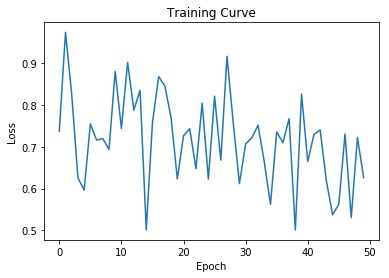

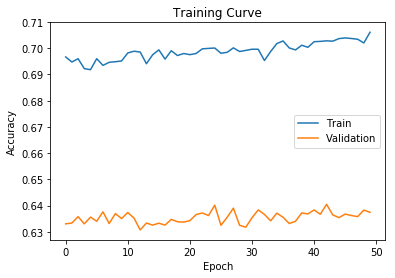

0.6300176646159469

In [43]:
model_lstm = TweetLSTM(input_size=50, hidden_size=50, num_classes=num_classes)
train_rnn_network(model, train_loader, valid_loader, num_epochs=50, learning_rate=5e-4)
get_accuracy(model, test_loader)